In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arsenal.profiling import profiler, prof_to_graphviz

In [3]:
import numpy as np
from genparse.util import LarkStuff
from genparse import locally_normalize
from genparse.cfglm import BoolMaskCFGLM
from arsenal import timeit

WARNING 06-30 00:03:31 _custom_ops.py:14] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


In [4]:
cfg = LarkStuff(open('../benchmark/grammars/sql_case_sensitive.lark').read()).char_cfg(
    0.99, ignore='[ ]?'
)
cfg = locally_normalize(cfg, tol=1e-40, maxiter=np.inf)

with timeit('boolean LM preprocessing'):
    guide = BoolMaskCFGLM(cfg)

boolean LM preprocessing (3.2283 sec)


wrote: out.prof (use `gprof-viz` to view)


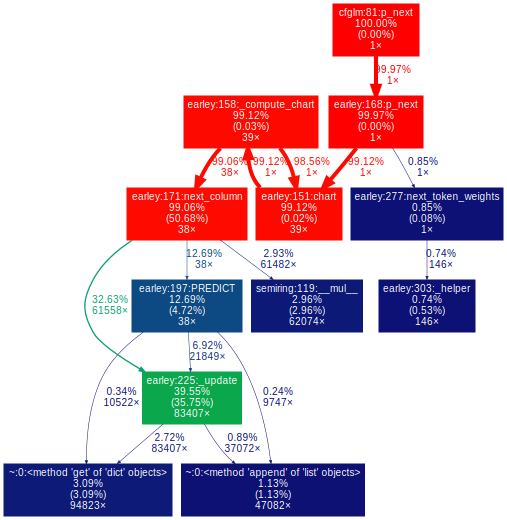

In [5]:
guide.model._chart.clear()
with profiler():
    guide.p_next('SELECT song_name FROM singer WHERE age')
display(prof_to_graphviz('out.prof'))

wrote: out.prof (use `gprof-viz` to view)


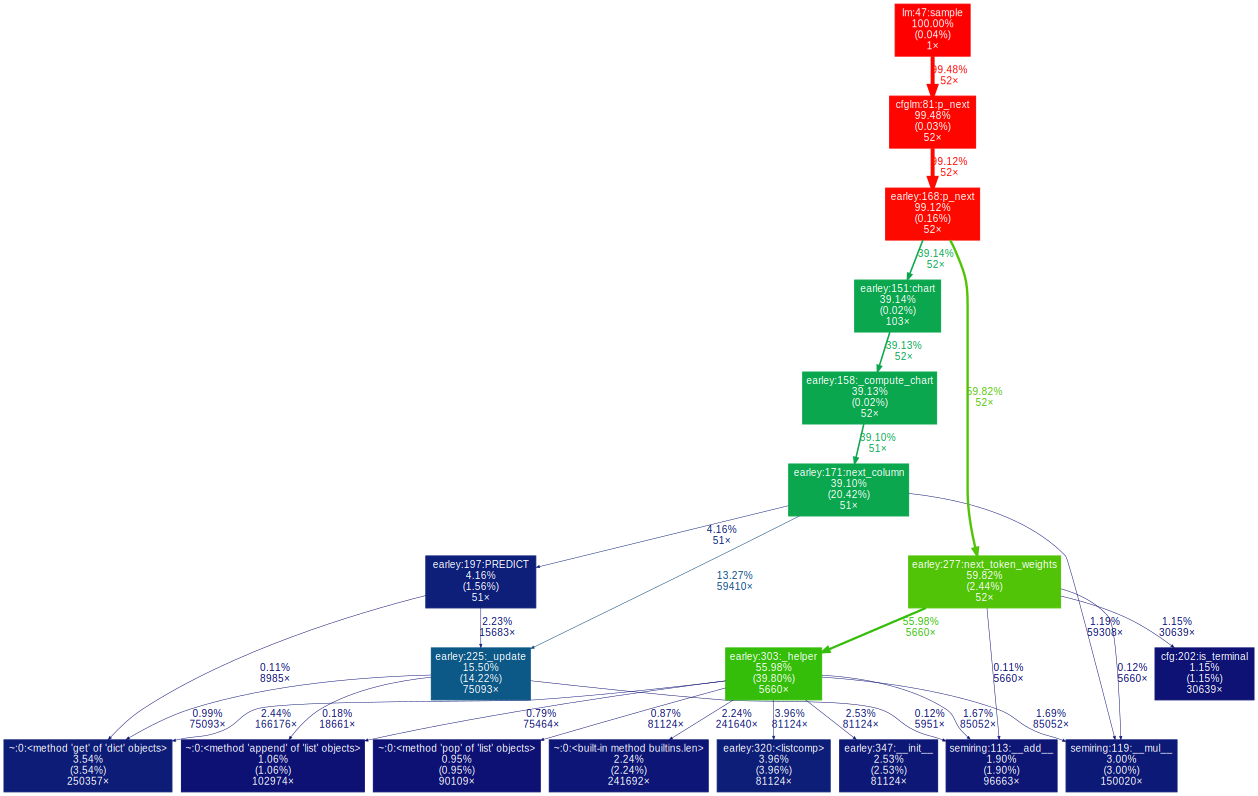

In [6]:
guide.model._chart.clear()
with profiler():
    out = guide.sample(max_tokens=50)
display(prof_to_graphviz('out.prof'))